In [17]:
#!rm -rf code
#!git clone https://xxxx/yyyy.git code
#!mv code/* .
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_datasets import *
import pandas as pd
import seaborn as sns
import pickle
from IPython.display import clear_output
import matplotlib
from scipy.optimize import curve_fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Fixed single Boston experiment for all dataset as points

In [36]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [37]:
# pfailure for the first layer
p = 1e-2
np.random.seed(42)

In [38]:
repetitions = 10
Ns = np.arange(10, 200, 20)
print('Total runs: %d' % (repetitions * len(Ns)))

Total runs: 100


In [39]:
def run_for_N(N = 50):
    """ Train a network with given h1 size and compute mean FT variance """
    K.clear_session()
    
    # run with random weights and multiple inputs
    exp = BostonHousingExperiment(N = [N, 49], p_inference = [0, p, 0, 0], seed = int(np.random.random() * 100000),
                                  activation = 'sigmoid', epochs = 200, do_print = 'plot',
                                  reg_coeff = 0, reg_type = 'l2')
    
    print('Loss: %s' % str(exp.get_mae_correct()))

    # obtaining data points
    data = exp.get_inputs(50)

    # obtaining errors and bounds for data points
    rmean, rstd = exp.run(data, repetitions = 10000)

    return np.mean(rstd['experiment'] ** 2)

  0%|          | 0/10 [00:00<?, ?it/s]

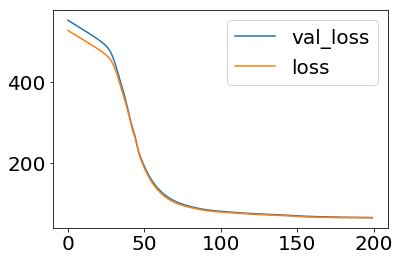

Loss: {'train': 5.570595852219232, 'test': 6.035336008258894}


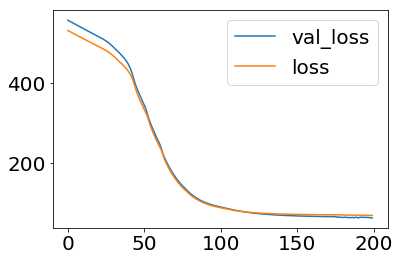

Loss: {'train': 6.00053597440814, 'test': 5.836215617609959}


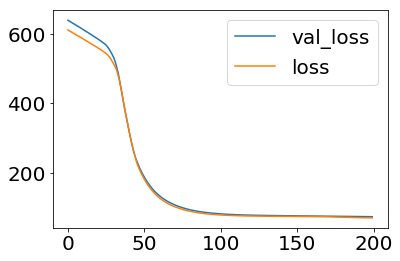

Loss: {'train': 5.829549051511406, 'test': 6.1264811964596015}


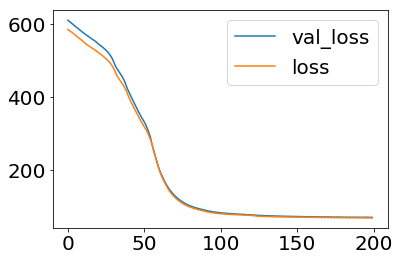

Loss: {'train': 6.032275321696065, 'test': 6.101634141510608}


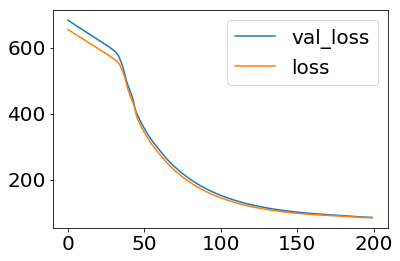

Loss: {'train': 6.2464665375133555, 'test': 6.437934321983189}


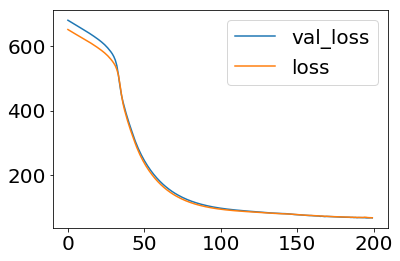

Loss: {'train': 5.592760695561324, 'test': 6.028825200772753}


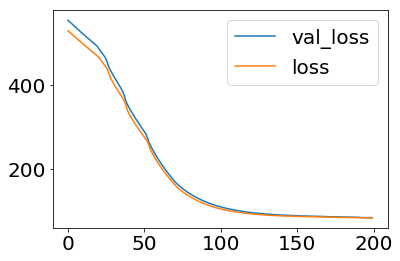

Loss: {'train': 6.464453700037286, 'test': 6.448269903893565}


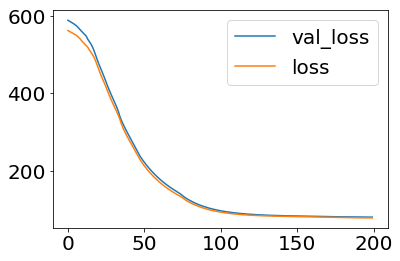

Loss: {'train': 6.275101244331587, 'test': 6.376186206294042}


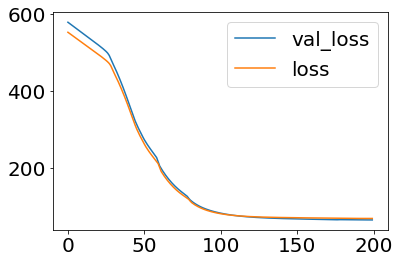

Loss: {'train': 5.828456608139643, 'test': 6.056027014115277}


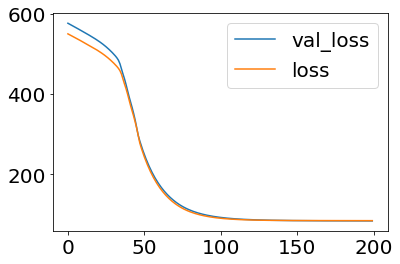

Loss: {'train': 6.624852981189691, 'test': 6.517950805963254}


 10%|█         | 1/10 [00:46<06:58, 46.54s/it]

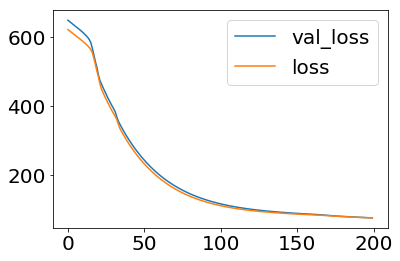

Loss: {'train': 5.875238566823525, 'test': 6.21996732599595}


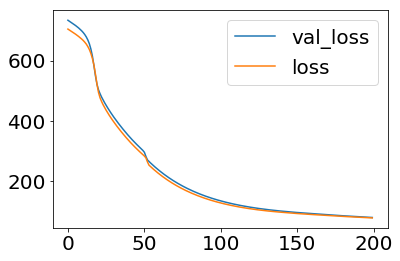

Loss: {'train': 5.9144815440225145, 'test': 6.389303835700541}


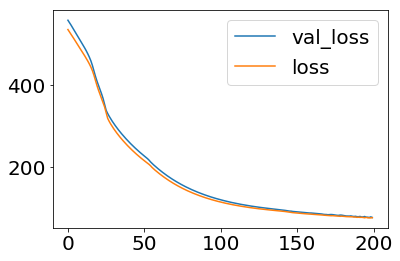

Loss: {'train': 5.675895972771221, 'test': 6.082762205834482}


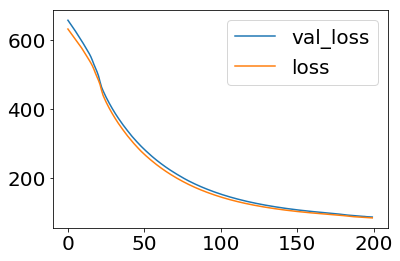

Loss: {'train': 6.106328367478778, 'test': 6.576850655499626}


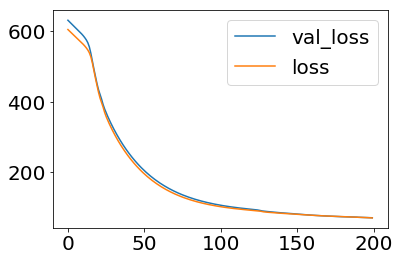

Loss: {'train': 5.4251982212066645, 'test': 6.022382414574718}


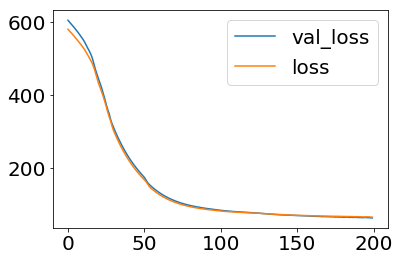

Loss: {'train': 5.3252730638674, 'test': 5.651951946931727}


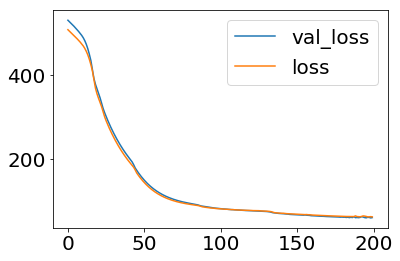

Loss: {'train': 5.235993328188906, 'test': 5.535339009528067}


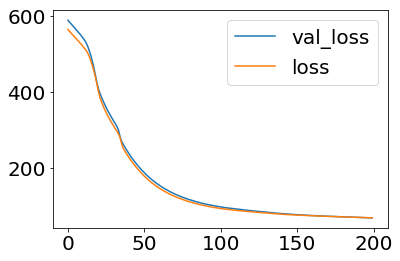

Loss: {'train': 5.4326509565410035, 'test': 5.960251142464433}


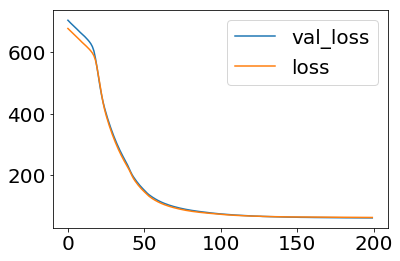

Loss: {'train': 5.559948143156449, 'test': 5.946135945413627}


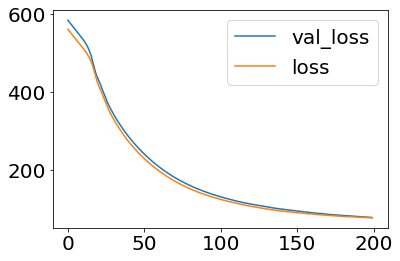

Loss: {'train': 5.663812839866865, 'test': 6.150623136408189}


 20%|██        | 2/10 [01:34<06:15, 46.91s/it]

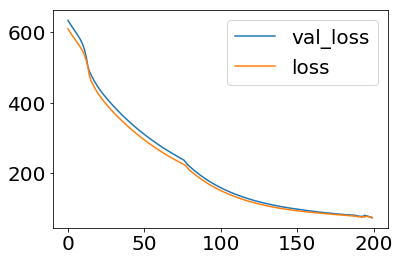

Loss: {'train': 5.405842284400865, 'test': 5.901107556212183}


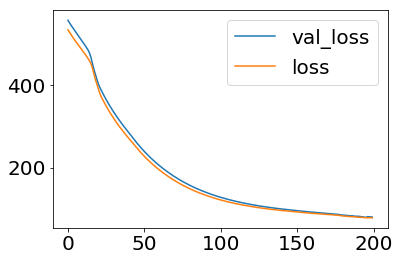

Loss: {'train': 5.8160306156271755, 'test': 6.271987189498602}


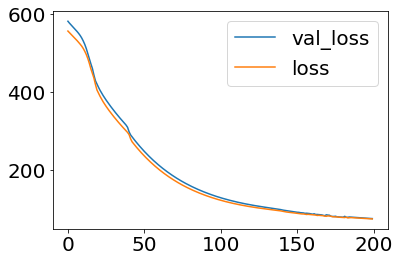

Loss: {'train': 5.628788982051434, 'test': 6.258157685223747}


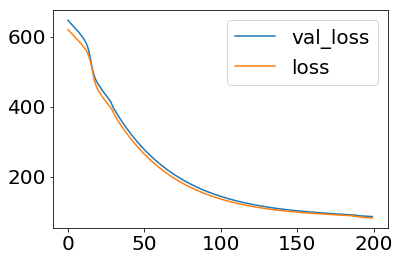

Loss: {'train': 6.003107587417754, 'test': 6.486758660335166}


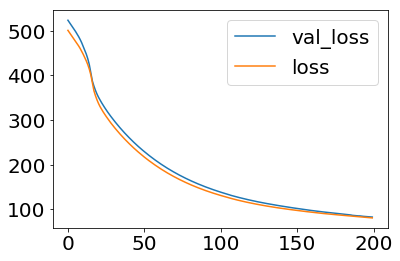

Loss: {'train': 5.806039134110554, 'test': 6.412626509572945}


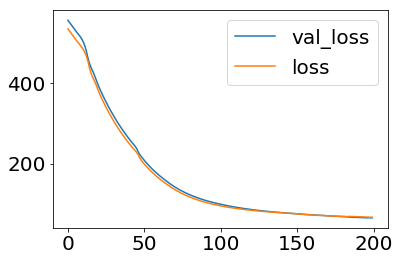

Loss: {'train': 5.4846032610034, 'test': 5.9432998937719015}


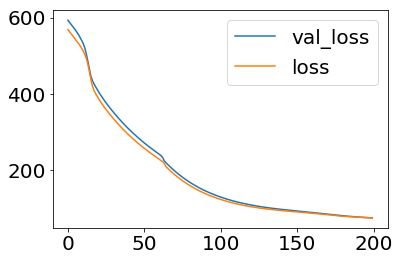

Loss: {'train': 5.6686746979704, 'test': 6.12646453146841}


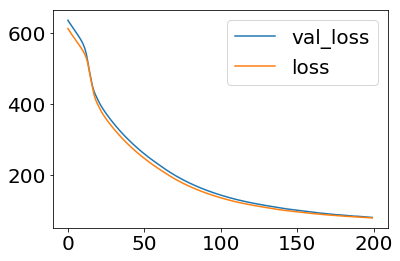

Loss: {'train': 5.825738306328802, 'test': 6.4053042879291615}


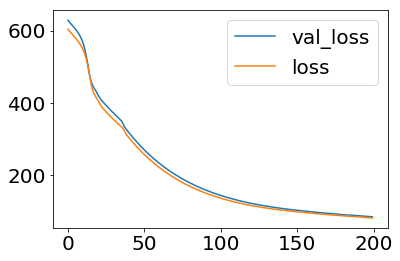

Loss: {'train': 5.951646683003643, 'test': 6.507828306684307}


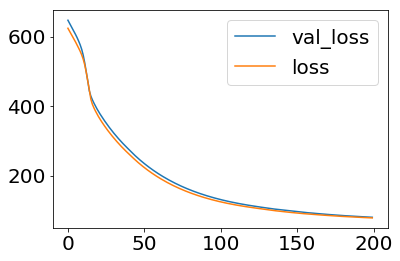

Loss: {'train': 5.779477955091117, 'test': 6.271885901806402}


 30%|███       | 3/10 [02:23<05:32, 47.46s/it]

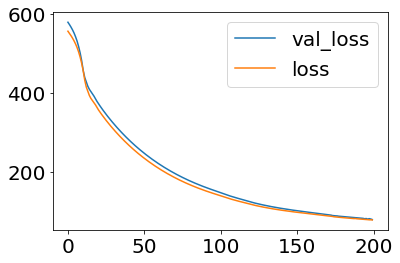

Loss: {'train': 5.682933929178975, 'test': 6.233244546254476}


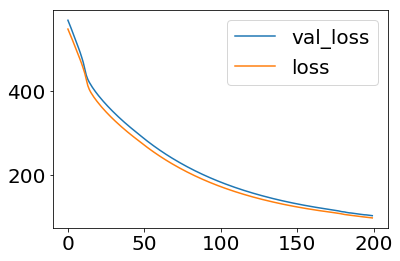

Loss: {'train': 6.686367496641555, 'test': 7.584280745188396}


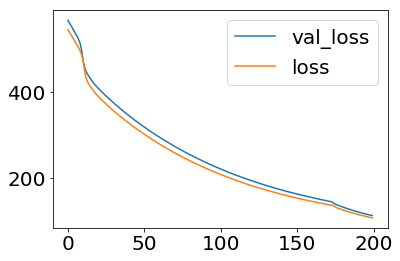

Loss: {'train': 7.087264220077213, 'test': 7.93314167845483}


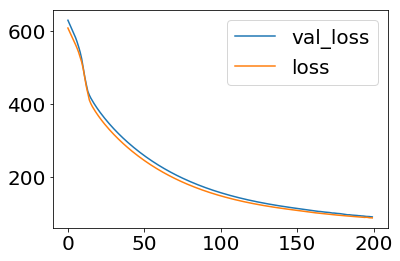

Loss: {'train': 6.101016046033048, 'test': 6.793536893059226}


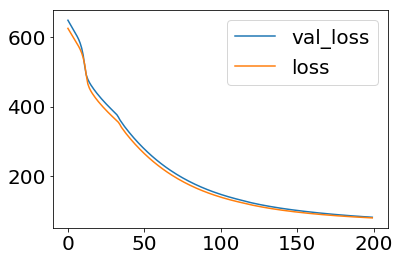

Loss: {'train': 5.839606633988938, 'test': 6.538406800288779}


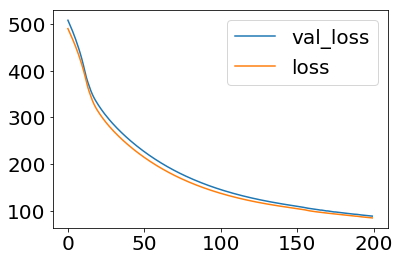

Loss: {'train': 5.9361684114626145, 'test': 6.735094147102506}


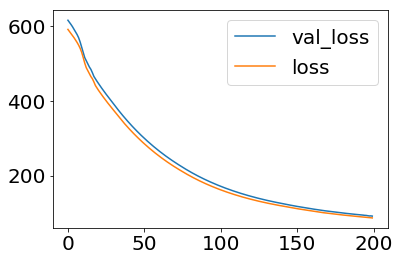

Loss: {'train': 6.096237272319227, 'test': 6.876490002052456}


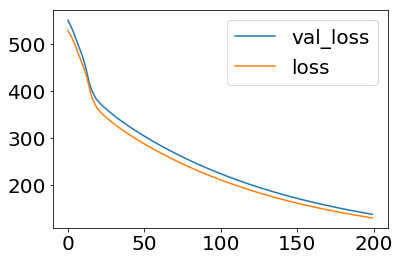

Loss: {'train': 8.143249589145775, 'test': 9.115488703110639}


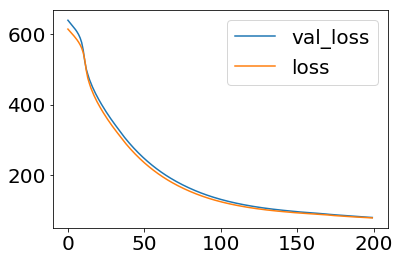

Loss: {'train': 5.935139519153255, 'test': 6.426310064278398}


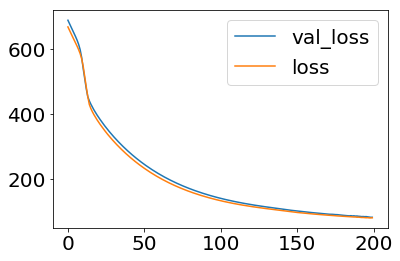

Loss: {'train': 5.741795203709367, 'test': 6.330508060081331}


 40%|████      | 4/10 [03:13<04:49, 48.31s/it]

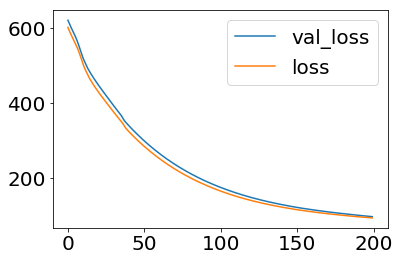

Loss: {'train': 6.528243397250034, 'test': 7.156071378670487}


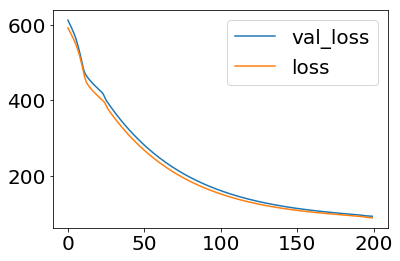

Loss: {'train': 6.242026291271247, 'test': 6.905953805586871}


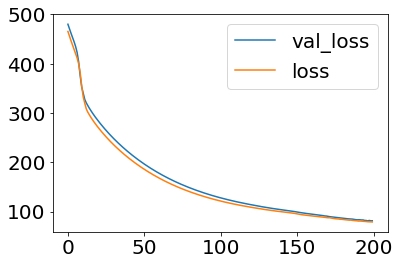

Loss: {'train': 5.8148914223850365, 'test': 6.3302230030882605}


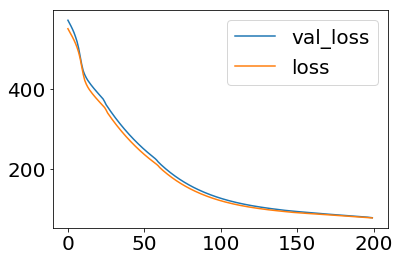

Loss: {'train': 5.817138315899537, 'test': 6.1515241716422295}


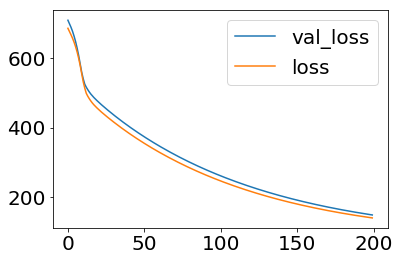

Loss: {'train': 8.56942864691857, 'test': 9.578535951352587}


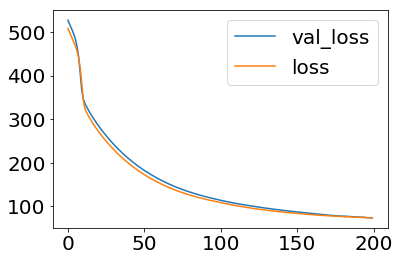

Loss: {'train': 5.596092951179731, 'test': 6.072131957259833}


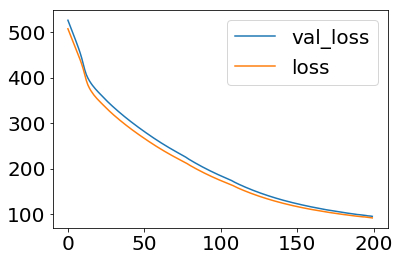

Loss: {'train': 6.4074650084618305, 'test': 7.0504810445448935}


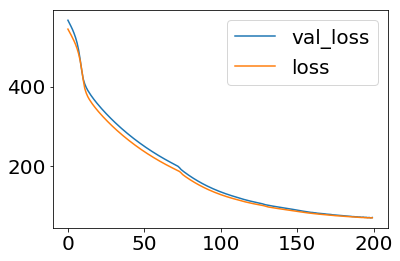

Loss: {'train': 5.394190862863372, 'test': 6.064739859337901}


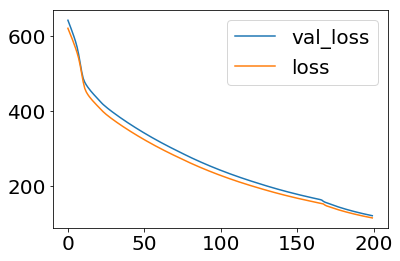

Loss: {'train': 7.454146456010271, 'test': 8.333210440242992}


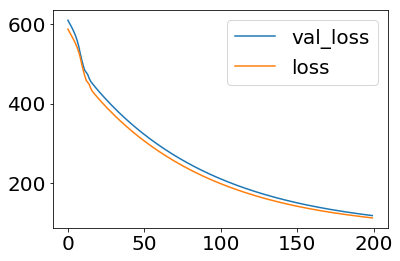

Loss: {'train': 7.411089695090115, 'test': 8.250763388241038}


 50%|█████     | 5/10 [04:04<04:06, 49.30s/it]

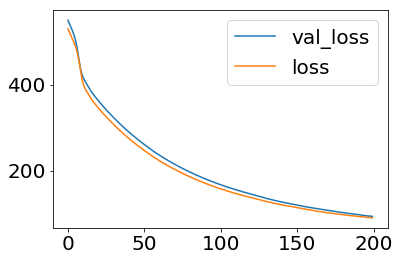

Loss: {'train': 6.231877650364791, 'test': 6.962947168537215}


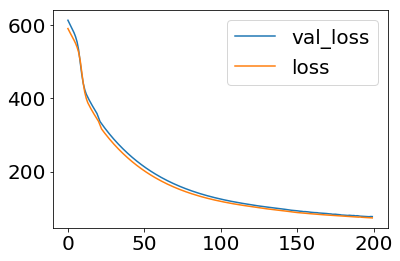

Loss: {'train': 5.564440670579967, 'test': 6.231034267649931}


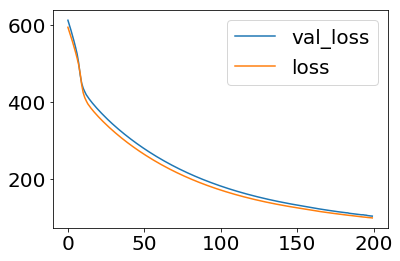

Loss: {'train': 6.6169818764866, 'test': 7.476752630869548}


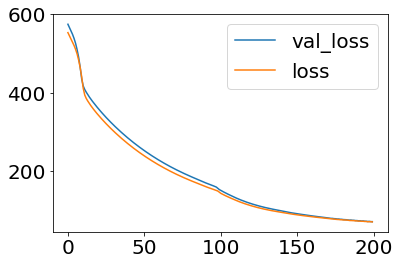

Loss: {'train': 5.529720213861749, 'test': 5.942642294191846}


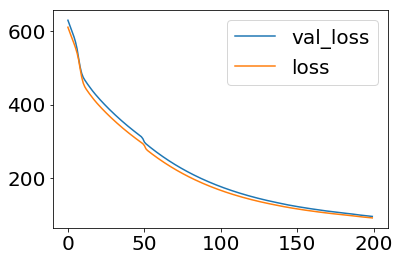

Loss: {'train': 6.3748073228515025, 'test': 7.1360041637046665}


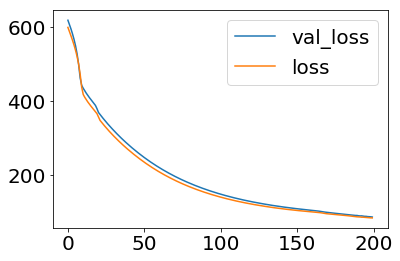

Loss: {'train': 5.914257315833971, 'test': 6.550337944778742}


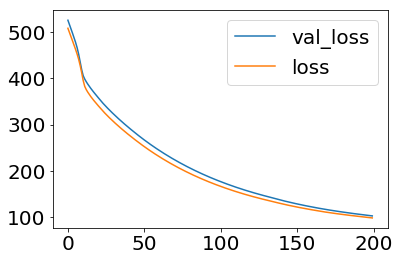

Loss: {'train': 6.77120991319713, 'test': 7.469583242079791}


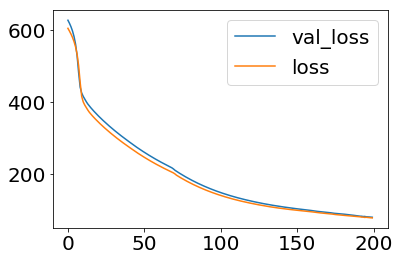

Loss: {'train': 5.731396000456101, 'test': 6.234724676842782}


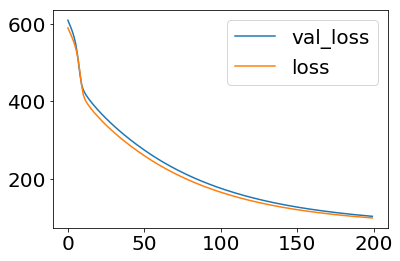

Loss: {'train': 6.882099127061295, 'test': 7.505604119394341}


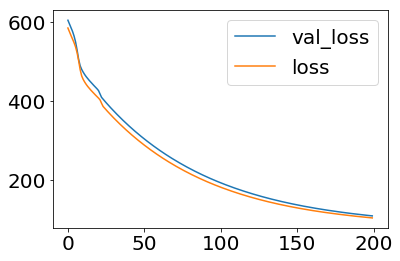

Loss: {'train': 7.11942153779587, 'test': 7.865258097181133}


 60%|██████    | 6/10 [04:57<03:20, 50.25s/it]

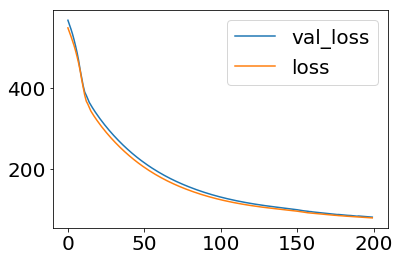

Loss: {'train': 5.716663418665972, 'test': 6.28803482616649}


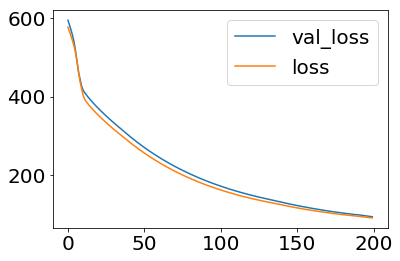

Loss: {'train': 6.284477117746183, 'test': 6.9637266383451575}


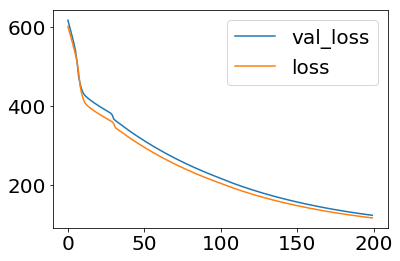

Loss: {'train': 7.653930965272506, 'test': 8.553522801866718}


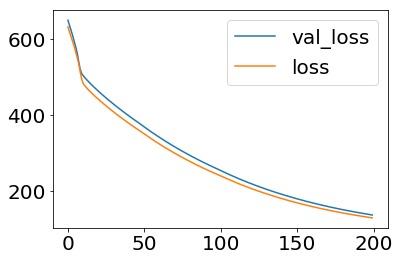

Loss: {'train': 8.152195570728566, 'test': 9.12233986200071}


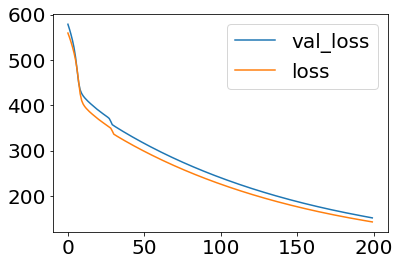

Loss: {'train': 8.727943715482656, 'test': 9.748085753122966}


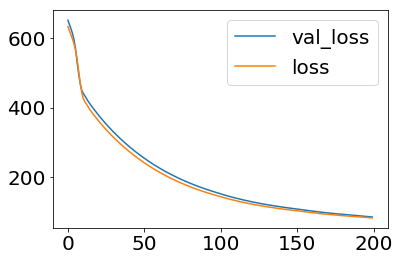

Loss: {'train': 5.871147535815098, 'test': 6.519276312285779}


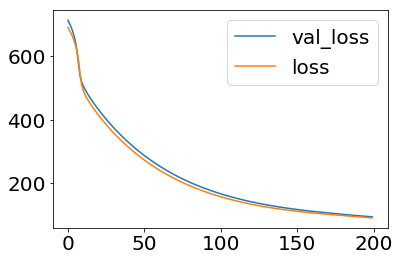

Loss: {'train': 6.330020999908448, 'test': 7.021020399355421}


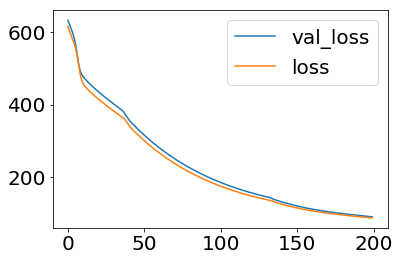

Loss: {'train': 6.176020236534648, 'test': 6.7103133874781}


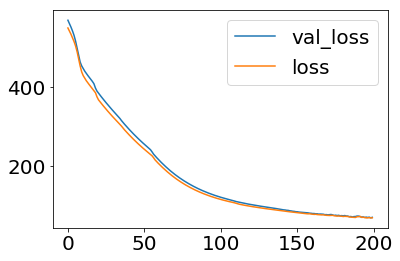

Loss: {'train': 5.236806747700909, 'test': 5.983914242538751}


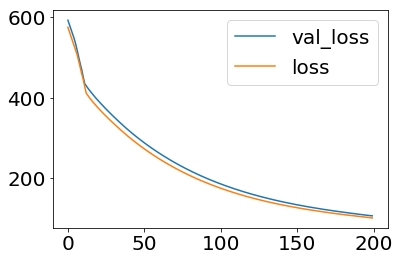

Loss: {'train': 6.848155151971497, 'test': 7.6574706395467125}


 70%|███████   | 7/10 [05:51<02:34, 51.44s/it]

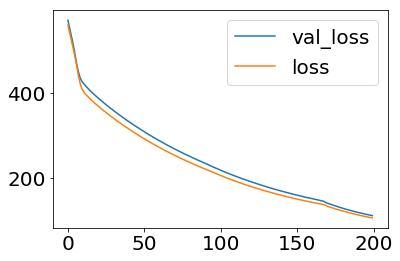

Loss: {'train': 7.0624011653484695, 'test': 7.904777356690052}


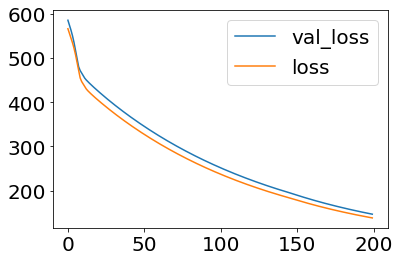

Loss: {'train': 8.51101788341409, 'test': 9.520206715078915}


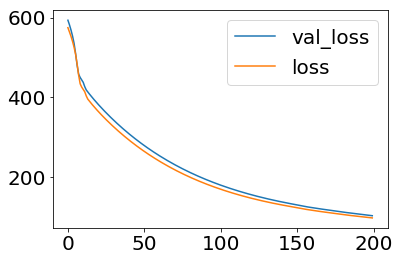

Loss: {'train': 6.559687596028394, 'test': 7.442133551952886}


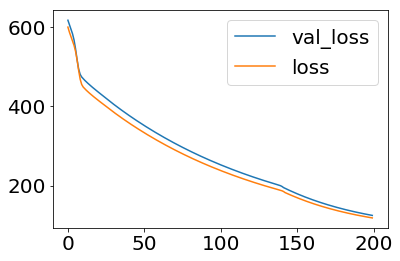

Loss: {'train': 7.680560310288231, 'test': 8.563033627528771}


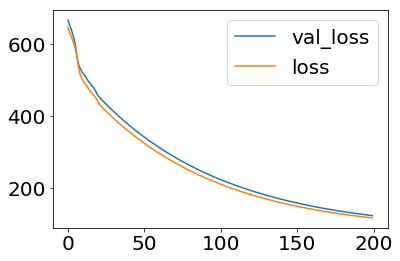

Loss: {'train': 7.6309481734096405, 'test': 8.505430632946538}


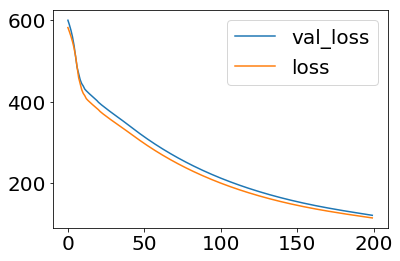

Loss: {'train': 7.428025054459525, 'test': 8.355521033791934}


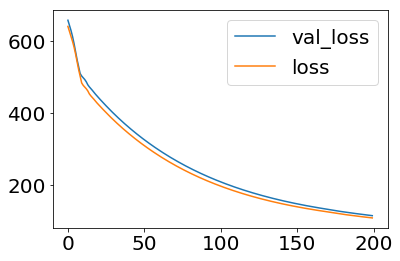

Loss: {'train': 7.125083427618046, 'test': 8.015679221059763}


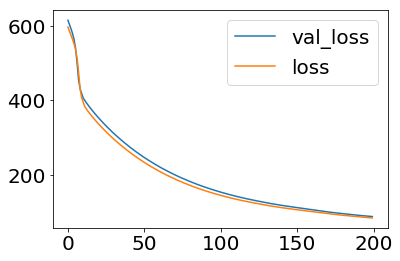

Loss: {'train': 5.9850073460305095, 'test': 6.708579108294319}


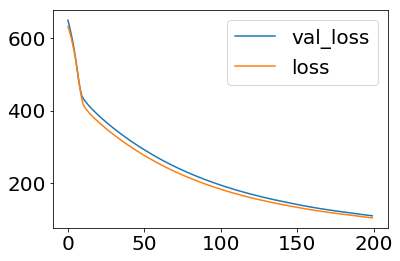

Loss: {'train': 6.9697680945443645, 'test': 7.852031939637428}


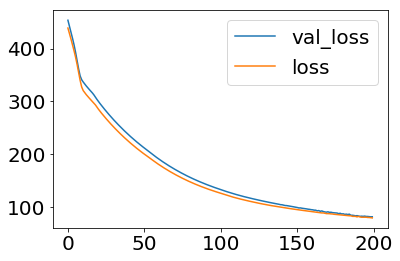

Loss: {'train': 5.589913762914072, 'test': 6.3541605743707406}


 80%|████████  | 8/10 [06:46<01:45, 52.60s/it]

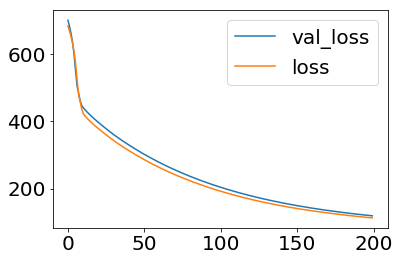

Loss: {'train': 7.417997397998772, 'test': 8.292694447087307}


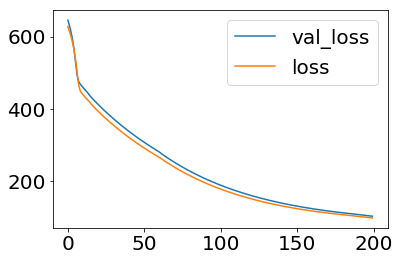

Loss: {'train': 6.763589347235047, 'test': 7.526424344380697}


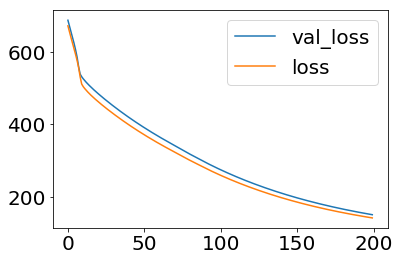

Loss: {'train': 8.722130017705483, 'test': 9.741495657902139}


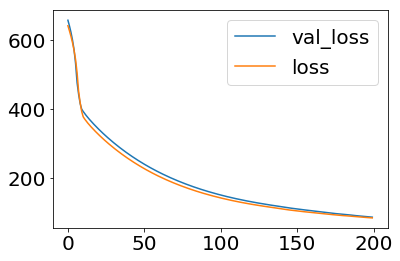

Loss: {'train': 6.014358325523905, 'test': 6.632954539504706}


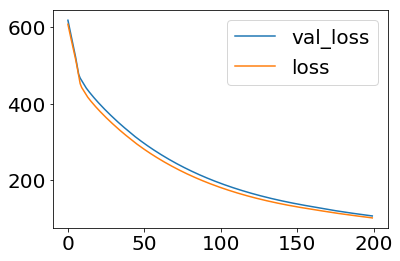

Loss: {'train': 6.82784085604224, 'test': 7.64701930401372}


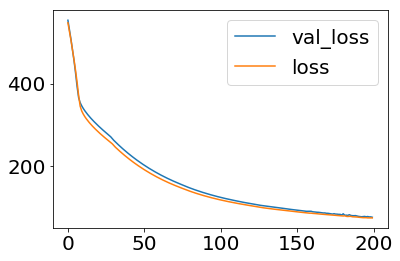

Loss: {'train': 5.5288966462163645, 'test': 6.160021778181488}


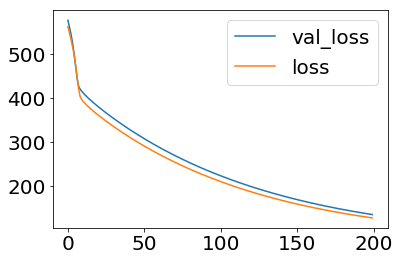

Loss: {'train': 8.120509779335249, 'test': 9.076357772303563}


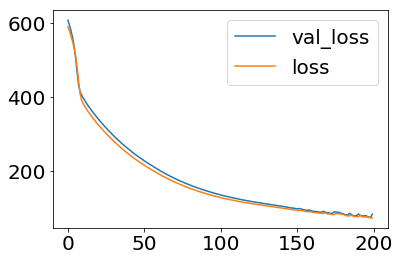

Loss: {'train': 5.7251031696206285, 'test': 6.625492454977596}


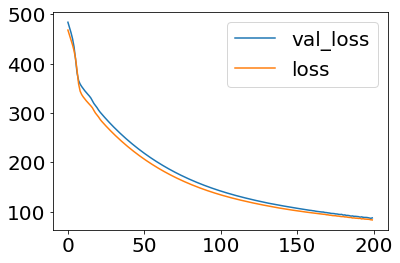

Loss: {'train': 6.0061936142421, 'test': 6.606071763880113}


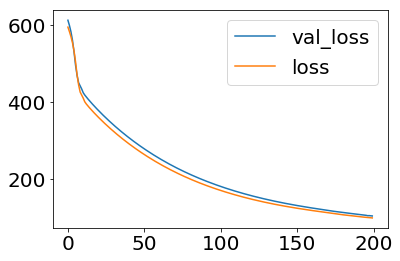

Loss: {'train': 6.6972753841097985, 'test': 7.525051307678224}


 90%|█████████ | 9/10 [07:43<00:53, 53.76s/it]

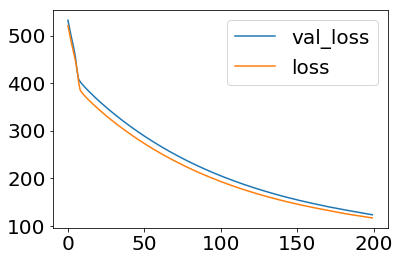

Loss: {'train': 7.511272399260267, 'test': 8.44449769749361}


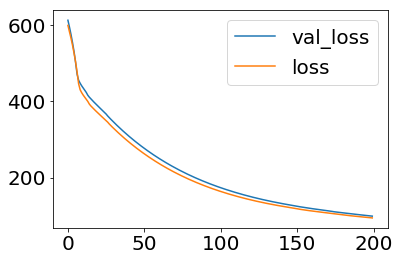

Loss: {'train': 6.429743102989575, 'test': 7.2008506849700336}


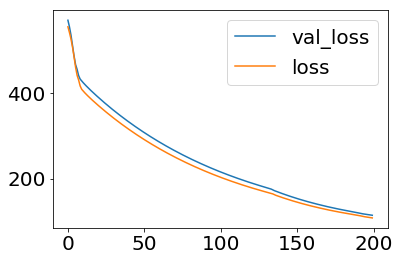

Loss: {'train': 7.099717424883702, 'test': 8.016932665133009}


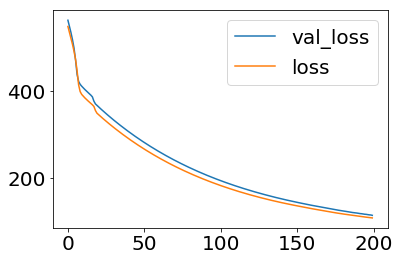

Loss: {'train': 7.073948820038598, 'test': 7.977780418769987}


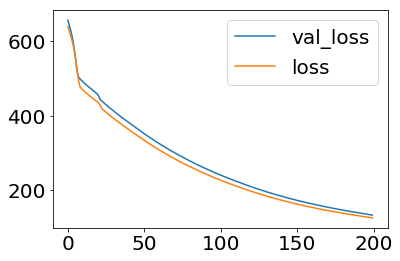

Loss: {'train': 7.928916399077615, 'test': 8.91111021228865}


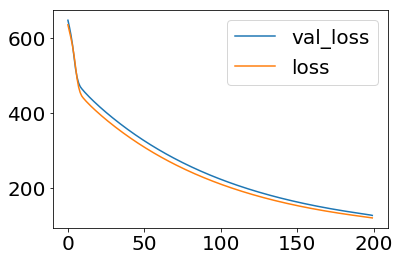

Loss: {'train': 7.809147902762535, 'test': 8.730454269109988}


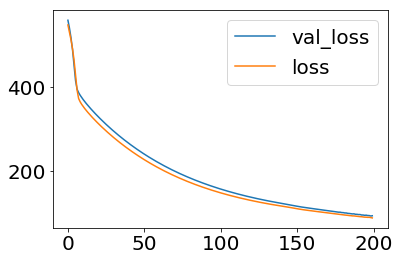

Loss: {'train': 6.265085327979363, 'test': 7.055020106072519}


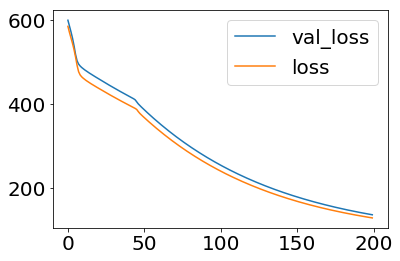

Loss: {'train': 8.113638645587582, 'test': 9.068348114163268}


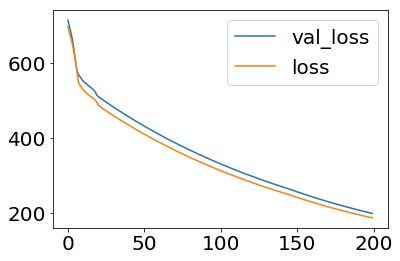

Loss: {'train': 10.511917866810714, 'test': 11.546955434013816}


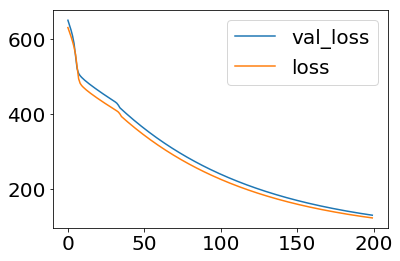

Loss: {'train': 7.932063922315541, 'test': 8.870829054888556}


100%|██████████| 10/10 [08:41<00:00, 55.16s/it]


In [40]:
results = [[run_for_N(N) for _ in range(repetitions)] for N in tqdm(Ns)]

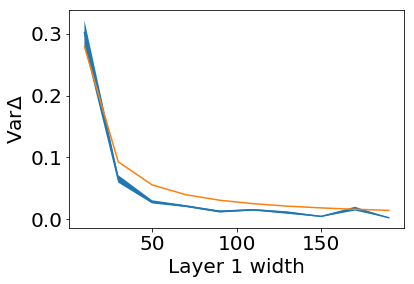

In [41]:
mean = np.mean(results, axis = 1)
std = np.std(results, axis = 1) / len(results[0])

def hyperbola(x, a):
    return 1. * a / x
hyperbola_coeff = curve_fit(hyperbola, Ns, mean)[0][0]

plt.figure()
plt.xlabel('Layer 1 width')
plt.ylabel('Var$\Delta$')
plt.plot(Ns, mean)
plt.plot(Ns, hyperbola_coeff / Ns)
plt.fill_between(Ns, mean - std, mean + std)
#plt.ylim(0,0.2)
plt.savefig('figures/comparison_architecture_boston.eps', bbox_inches = 'tight')
plt.show()

In [42]:
# fitting line to logarithmic plot
np.polyfit(np.log(Ns), np.log(mean), 1)

array([-1.34129829,  1.84809829])